In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np

In [2]:
demo = pd.read_csv("C:\\Users\\chris\\Documents\\Math168Project\\reddit_data.csv")
demo['Subreddit'].unique()

array(['trueantivaccination', 'vaccines', 'covidvaccine',
       'covidvaccinated', 'antivaxxers', 'conspiracy',
       'conspiracytheories', 'conspiracy_commons', 'covid19',
       'coronavirus', 'conservative', 'news'], dtype=object)

In [3]:
demo.groupby(['Subreddit'])[['Author', 'Parent_Author']].count()

,Author,Parent_Author
Subreddit,,
antivaxxers,3011,2778
conservative,11738,10962
conspiracy,69385,65963
conspiracy_commons,2632,2443
conspiracytheories,846,806
coronavirus,38818,36230
covid19,1753,1667
covidvaccinated,4210,3977
covidvaccine,582,565


In [8]:
demo

,index,ID,Date_utc,Author,Body,Submission,Parent_ID,Parent_Author,Level,Subreddit,Submission_Author,Submission_Title
0,2083,hb50z1h,1.630463e+09,Melodic_Machine_9818,No ! They ask so they can bill your insurance ...,pfkfz3,pfkfz3,shellyduck01,1,covidvaccine,shellyduck01,Is it necessary to give my insurance when gett...
1,2084,hb54l1w,1.630465e+09,RandomUsername1119,No you dont need to. It's free,pfkfz3,pfkfz3,shellyduck01,1,covidvaccine,shellyduck01,Is it necessary to give my insurance when gett...
2,2085,hb59fi2,1.630468e+09,geebees12,No,pfkfz3,pfkfz3,shellyduck01,1,covidvaccine,shellyduck01,Is it necessary to give my insurance when gett...
3,2086,hb6226g,1.630489e+09,Yogurtsamples,"Even if you put your insurance, it won’t get b...",pfkfz3,pfkfz3,shellyduck01,1,covidvaccine,shellyduck01,Is it necessary to give my insurance when gett...
4,2087,hb6fn9o,1.630499e+09,kateskateskatess,No insurance card necessary. It’s free,pfkfz3,pfkfz3,shellyduck01,1,covidvaccine,shellyduck01,Is it necessary to give my insurance when gett...
...,...,...,...,...,...,...,...,...,...,...,...,...
577,2660,h8wbjvm,1.628939e+09,YourSparrowness,"Not just “issues”, I have friends with full bl...",p1xhor,h8guq1h,NaN,2,covidvaccine,victoria1204x,Should I get the vaccine if I have had severe ...
578,2661,h8gde0g,1.628628e+09,Books_are_my_soul,I wouldn’t trust unreliable Reddit user opinio...,p1xhor,p1xhor,victoria1204x,1,covidvaccine,victoria1204x,Should I get the vaccine if I have had severe ...
579,2662,h8glt2o,1.628632e+09,mkdr,No doctor has a crystal ball. Nothing a doctor...,p1xhor,h8gde0g,Books_are_my_soul,2,covidvaccine,victoria1204x,Should I get the vaccine if I have had severe ...
580,2663,h8kyho3,1.628716e+09,Creative-Fail-5714,NO!\r\n\r\nFrom the CDC website : \r\n\r\nWho ...,p1xhor,p1xhor,victoria1204x,1,covidvaccine,victoria1204x,Should I get the vaccine if I have had severe ...


In [5]:
G = nx.from_pandas_edgelist(demo, source = "Author", target = "Parent_Author", create_using = nx.MultiGraph)

component = max(nx.connected_components(G), key = len)
C = G.subgraph(component)

In [6]:
G = nx.Graph()
for u,v,data in C.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if G.has_edge(u,v):
        G[u][v]['weight'] += w
    else:
        G.add_edge(u, v, weight=w)

In [7]:
centrality = np.array(list(nx.betweenness_centrality(G, weight = 'weight').values()))

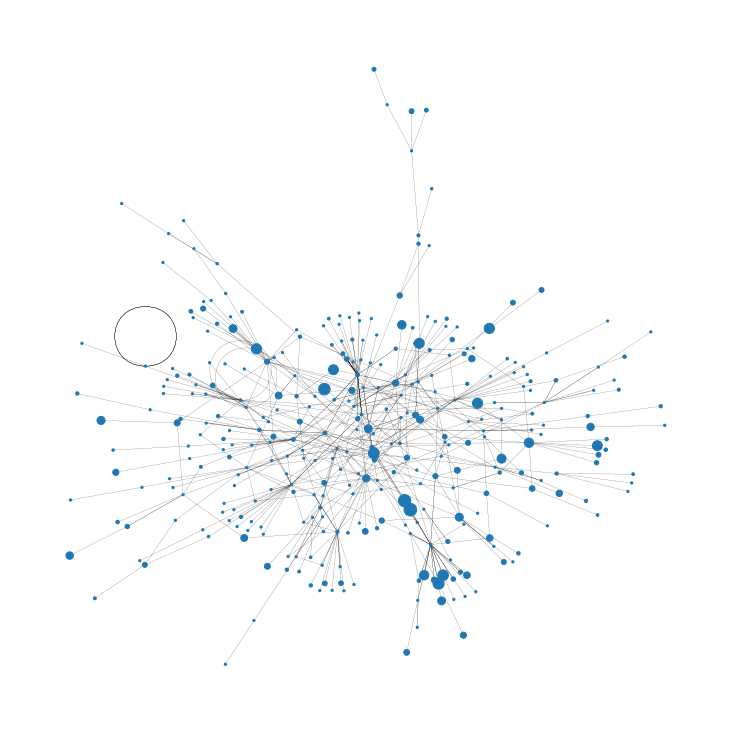

In [8]:
plt.figure(figsize = (10,10))
nx.draw(C, node_size = centrality*1000+5, width = 0.15)